# 1. Imports

In [188]:
import sys

In [189]:
sys.version_info

sys.version_info(major=3, minor=10, micro=15, releaselevel='final', serial=0)

In [190]:
assert sys.version_info >= (3, 6), "Python 3.6 or later is required"

In [191]:
from packaging import version
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [192]:
sklearn.__version__

'1.6.0'

In [193]:
assert version.parse(sklearn.__version__) >= version.parse("1.0.1"), "scikit-learn 1.0.1 or later is required"

In [194]:
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('figure', titlesize=16)
plt.rcParams['figure.figsize'] = [10, 6]

In [195]:
np.random.seed(88)

# 2. Life Satisfaction Regression

## 2.1 Exploration

In [196]:
lifesat = pd.read_csv("data/chap1/lifesat.csv")

In [197]:
lifesat

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456,5.8
1,Greece,27287,5.4
2,Turkey,28385,5.5
3,Latvia,29932,5.9
4,Hungary,31008,5.6
...,...,...,...
81,Tajikistan,800,4.5
82,Azerbaijan,4500,5.1
83,Georgia,4000,4.9
84,Armenia,3800,5.0


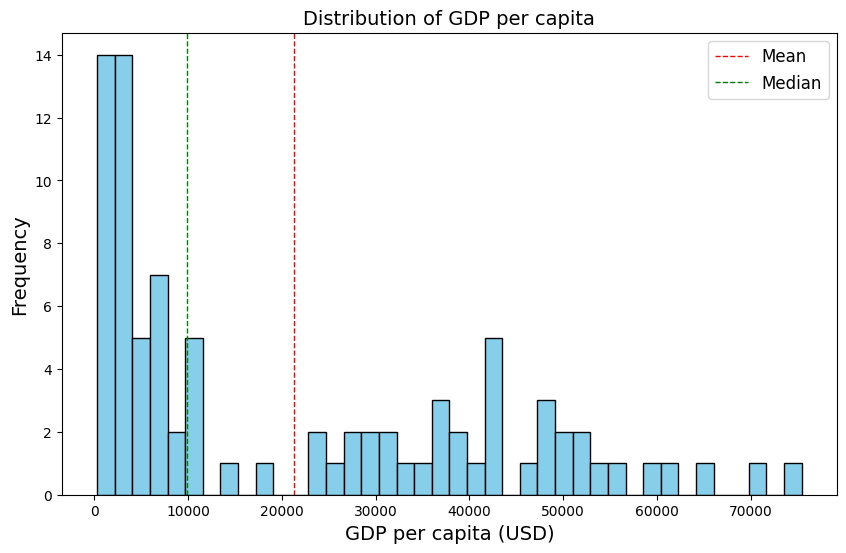

In [223]:
lifesat["GDP per capita (USD)"].hist(bins=40, edgecolor='black', color='skyblue')
plt.title('Distribution of GDP per capita')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Frequency')
plt.grid(False)
plt.axvline(lifesat["GDP per capita (USD)"].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(lifesat["GDP per capita (USD)"].median(), color='green', linestyle='dashed', linewidth=1)
plt.legend({'Mean': lifesat["GDP per capita (USD)"].mean(), 'Median': lifesat["GDP per capita (USD)"].median()})
plt.show()

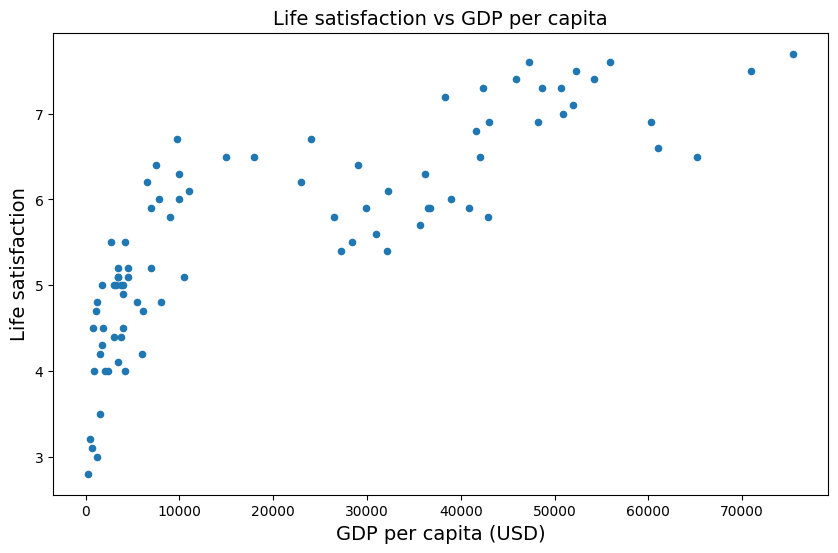

In [198]:
lifesat.plot(kind='scatter', x="GDP per capita (USD)", y="Life satisfaction", title="Life satisfaction vs GDP per capita")
plt.show()

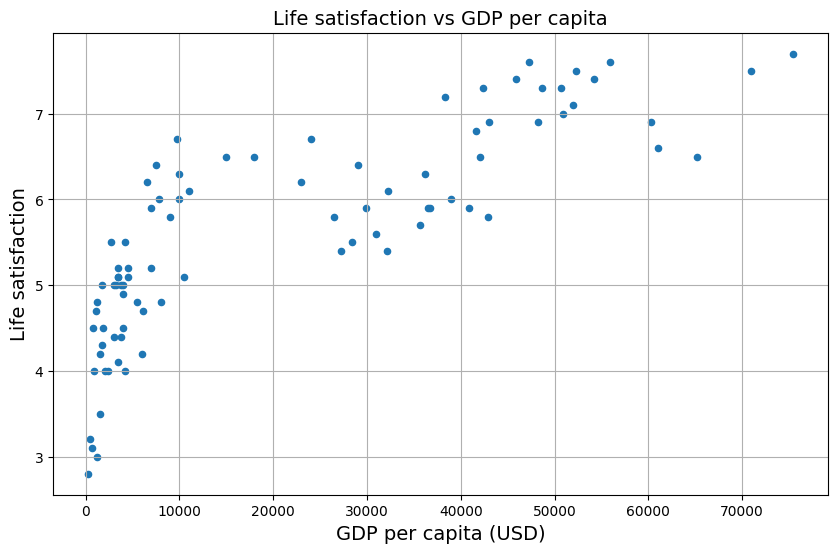

In [214]:
lifesat.plot(kind='scatter', x="GDP per capita (USD)", y="Life satisfaction", title="Life satisfaction vs GDP per capita", grid=True)
plt.show()

In [200]:
eu_countries = [
    "Greece", "Latvia", "Hungary", "Portugal", "Poland", "Estonia", "Spain", 
    "Slovenia", "Lithuania", "Italy", "France", "Finland", "Belgium", "Sweden", 
    "Germany", "Austria", "Netherlands", "Denmark"
]

In [201]:
lifesat["is_EU"] = lifesat["Country"].isin(eu_countries)

In [211]:
lifesat[lifesat["is_EU"] == False]

,Country,GDP per capita (USD),Life satisfaction,is_EU
0,Russia,26456,5.8,False
2,Turkey,28385,5.5,False
11,Israel,38341,7.2,False
13,United Kingdom,41627,6.8,False
15,New Zealand,42404,7.3,False
...,...,...,...,...
81,Tajikistan,800,4.5,False
82,Azerbaijan,4500,5.1,False
83,Georgia,4000,4.9,False
84,Armenia,3800,5.0,False


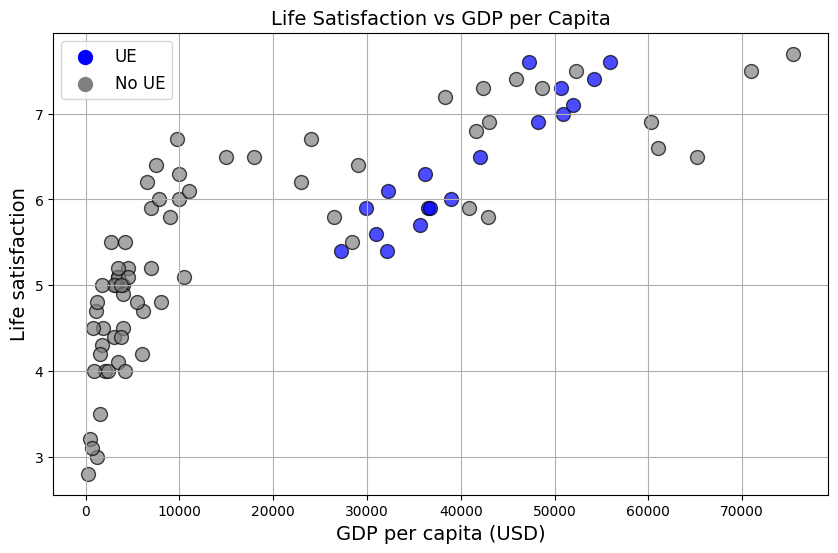

In [ ]:
for _, row in lifesat.iterrows():
    color = "blue" if row["is_EU"] else "gray"
    plt.scatter(row["GDP per capita (USD)"], row["Life satisfaction"], 
                color=color, s=100, alpha=0.7, edgecolors="black")
    
plt.scatter([], [], color="blue", s=100, label="EU")
plt.scatter([], [], color="gray", s=100, label="No EU")

plt.title("Life Satisfaction vs GDP per Capita")
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.grid(True)
plt.legend()
plt.show()

## 2.2 Modelling

In [227]:
lifesat[["GDP per capita (USD)"]]

array([[26456],
       [27287],
       [28385],
       [29932],
       [31008],
       [32181],
       [32238],
       [35638],
       [36215],
       [36548],
       [36732],
       [38341],
       [38992],
       [41627],
       [42026],
       [42404],
       [45857],
       [47261],
       [48210],
       [48698],
       [50683],
       [50922],
       [51936],
       [52280],
       [54210],
       [55938],
       [60236],
       [70989],
       [75420],
       [65233],
       [40847],
       [42928],
       [10500],
       [ 2100],
       [ 7500],
       [ 9800],
       [ 6100],
       [10000],
       [15000],
       [ 6500],
       [ 7000],
       [ 3500],
       [23000],
       [43000],
       [ 3000],
       [ 2400],
       [ 1800],
       [ 4000],
       [11000],
       [ 3500],
       [ 2700],
       [ 7800],
       [ 1500],
       [ 1900],
       [ 5500],
       [ 4200],
       [  500],
       [ 1200],
       [ 8000],
       [ 4500],
       [ 3200],
       [ 4000],
       [

In [ ]:
lifesat[["GDP per capita (USD)"]].values

In [226]:
lifesat["GDP per capita (USD)"]

array([26456, 27287, 28385, 29932, 31008, 32181, 32238, 35638, 36215,
       36548, 36732, 38341, 38992, 41627, 42026, 42404, 45857, 47261,
       48210, 48698, 50683, 50922, 51936, 52280, 54210, 55938, 60236,
       70989, 75420, 65233, 40847, 42928, 10500,  2100,  7500,  9800,
        6100, 10000, 15000,  6500,  7000,  3500, 23000, 43000,  3000,
        2400,  1800,  4000, 11000,  3500,  2700,  7800,  1500,  1900,
        5500,  4200,   500,  1200,  8000,  4500,  3200,  4000,  3500,
        6000,  1500,   900,   300,   700, 18000, 29000, 61000, 24000,
        3800,  1100,  3000, 10000,  4200,  9000,  1800,  7000,  1200,
         800,  4500,  4000,  3800,  3500])

In [ ]:
lifesat["GDP per capita (USD)"].values

In [203]:
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

In [204]:
model = sklearn.linear_model.LinearRegression()
model.fit()

TypeError: LinearRegression.fit() missing 2 required positional arguments: 'X' and 'y'

In [ ]:
# Visualize the data


# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[37_655.2]]  # Cyprus' GDP per capita in 2020
print(model.predict(X_new)) # outputs [[6.30165767]]